In [13]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
measurementColumns = inspector.get_columns('measurement')
for c in measurementColumns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
stationColumns = inspector.get_columns('station')
for c in stationColumns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# measurementColumns = inspector.get_columns(measurement)


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
mostRecentDate = session.query(Measurement.date) \
    .order_by(Measurement.date.desc()).first()
print(mostRecentDate)

('2017-08-23',)


<IPython.core.display.Javascript object>


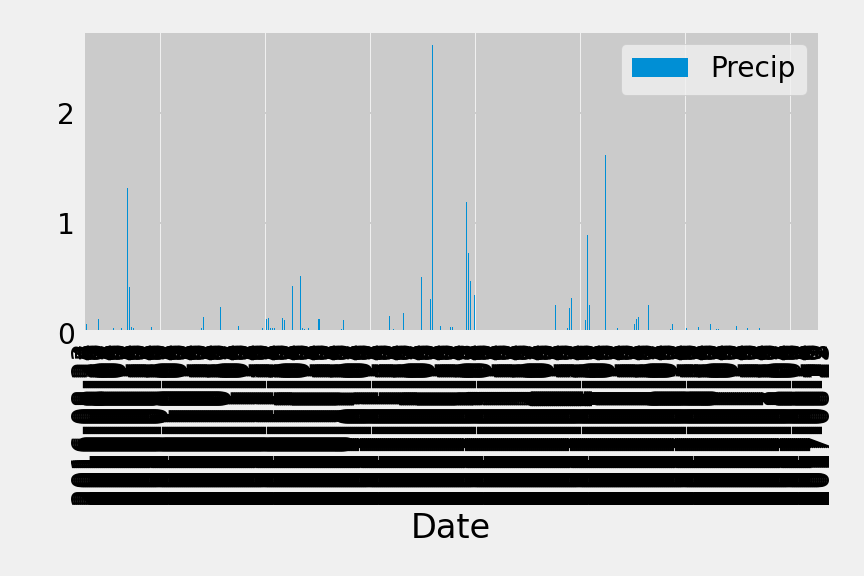

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recentDate = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
yearAgo = recentDate - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
lastYearPrecip = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= yearAgo).group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(lastYearPrecip, columns=['Date','Precip'])
precip_df.set_index('Date', inplace=True)
precip_df
# Sort the dataframe by date

precip_df = precip_df.sort_values(by='Date')
precip_df
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(kind='bar')
plt.tight_layout()
plt.show()


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()